### Importing the data set

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

In [2]:
import numpy as np

# Display the first few rows of the DataFrame
print("first few rows of the DataFrame")
print(df.head())
print("-------------------------------------------------------------")

# Check the basic statistics of the DataFrame
print("Basic statistics of the DataFrame")
print(df.describe())
print("-------------------------------------------------------------")

# Check the data types and non-null counts of each column
print("Data types and non-null counts of each column")
print(df.info())
print("-------------------------------------------------------------")

# Check for missing values in each column
print("missing values in each column")
print(df.isnull().sum())
print("-------------------------------------------------------------")

first few rows of the DataFrame
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08-11-2017  11-11-2017    Second Class    CG-12520   
1       2  CA-2017-152156  08-11-2017  11-11-2017    Second Class    CG-12520   
2       3  CA-2017-138688  12-06-2017  16-06-2017    Second Class    DV-13045   
3       4  US-2016-108966  11-10-2016  18-10-2016  Standard Class    SO-20335   
4       5  US-2016-108966  11-10-2016  18-10-2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Reg

###  Dropping rows with missing values

In [3]:
df.dropna(inplace=True)
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
1          2  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
2          3  CA-2017-138688  12-06-2017  16-06-2017    Second Class   
3          4  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
4          5  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21-05-2017  28-05-2017  Standard Class   
9796    9797  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9797    9798  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9798    9799  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9799    9800  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

### Fill missing value with specific value

In [4]:
# Replace missing values with 0
df.fillna(0, inplace=True)

# Or replace missing values with the mean/median of the column
df.fillna(df.mean(), inplace=True)

print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
1          2  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
2          3  CA-2017-138688  12-06-2017  16-06-2017    Second Class   
3          4  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
4          5  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21-05-2017  28-05-2017  Standard Class   
9796    9797  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9797    9798  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9798    9799  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9799    9800  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

C:\Users\panin\AppData\Local\Temp\ipykernel_21420\2989105041.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


### Removing duplicate rows

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.to_csv('superstore_cleaned_dataset.csv', index=False)

### Importing new dataset - Cleaned dataset

In [7]:
import pandas as pd
df = pd.read_csv('superstore_cleaned_dataset.csv')

#importing the new dtaaset - which is our cleaned data set

### After claning the data, we are going to check the following things 

### 1. Which category had the most sells 

In [8]:
# Group the data by category and calculate the total sales for each category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Sort the categories based on total sales in descending order
category_sales = category_sales.sort_values(by='Sales', ascending=False)

# Get the category with the most sales (the first row after sorting)
most_sold_category = category_sales.iloc[0]['Category']

print("Category with the most sales:", most_sold_category)


Category with the most sales: Technology


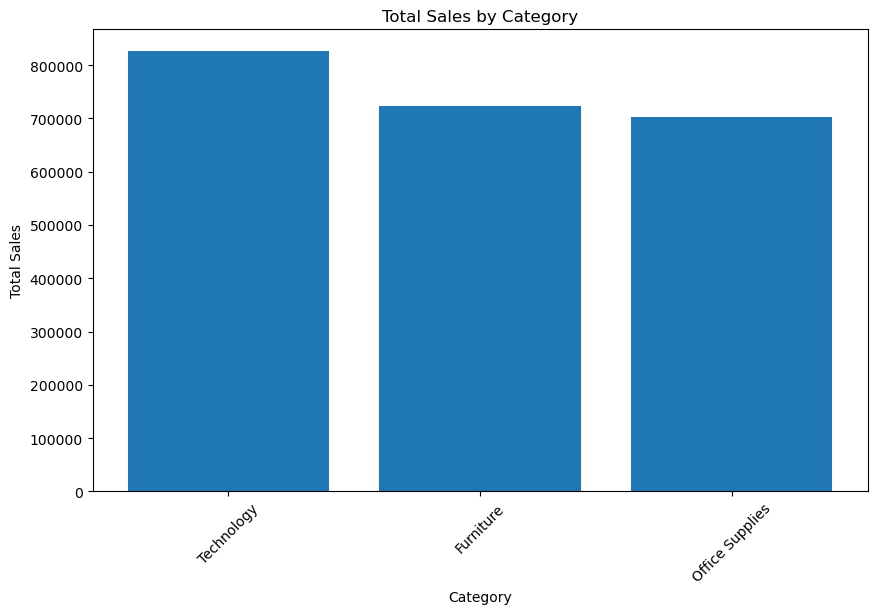

In [9]:
import matplotlib.pyplot as plt

# Group the data by category and calculate the total sales for each category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Sort the categories based on total sales in descending order
category_sales = category_sales.sort_values(by='Sales', ascending=False)

# Get the category with the most sales (the first row after sorting)
most_sold_category = category_sales.iloc[0]['Category']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_sales['Category'], category_sales['Sales'])
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()


### 2. From each category, which product is sold majorly?

In [10]:
# Group the data by category and product name and calculate the total sales for each combination
category_product_sales = df.groupby(['Category', 'Product Name'])['Sales'].sum().reset_index()

# For each category, find the product with the highest sales
major_product_in_category = category_product_sales.groupby('Category').apply(lambda x: x.loc[x['Sales'].idxmax()])

# Display the result
print("Product sold majorly from each category:")
print(major_product_in_category[['Category', 'Product Name', 'Sales']])


Product sold majorly from each category:
                        Category  \
Category                           
Furniture              Furniture   
Office Supplies  Office Supplies   
Technology            Technology   

                                                      Product Name      Sales  
Category                                                                       
Furniture             HON 5400 Series Task Chairs for Big and Tall  21870.576  
Office Supplies  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384  
Technology                   Canon imageCLASS 2200 Advanced Copier  61599.824  


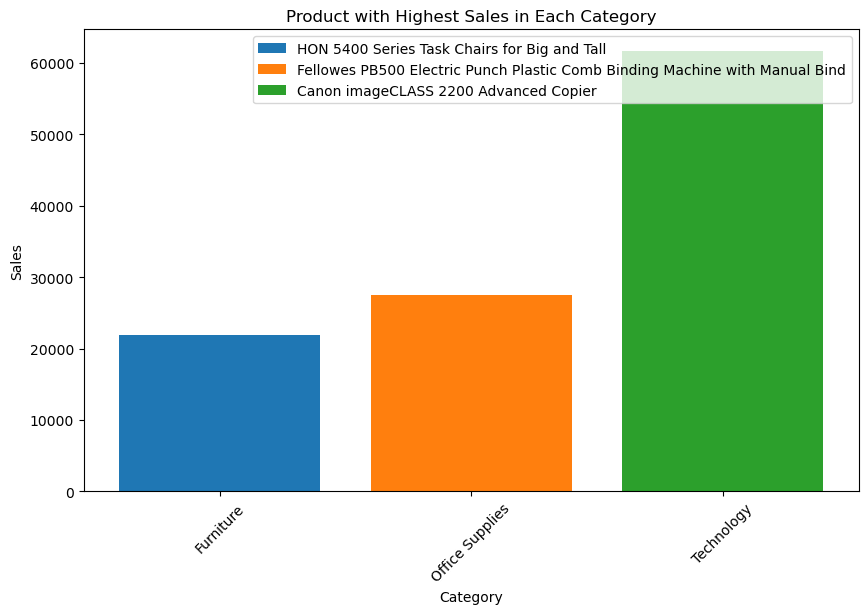

In [11]:
# Group the data by category and product name and calculate the total sales for each combination
category_product_sales = df.groupby(['Category', 'Product Name'])['Sales'].sum().reset_index()

# For each category, find the product with the highest sales
major_product_in_category = category_product_sales.groupby('Category').apply(lambda x: x.loc[x['Sales'].idxmax()])

# Plot the bar chart
plt.figure(figsize=(10, 6))
for category, product, sales in zip(major_product_in_category['Category'], major_product_in_category['Product Name'], major_product_in_category['Sales']):
    plt.bar(category, sales, label=product)

plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Product with Highest Sales in Each Category')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### 3. Date with the maximum sells of that superstore

C:\Users\panin\AppData\Local\Temp\ipykernel_21420\265846781.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


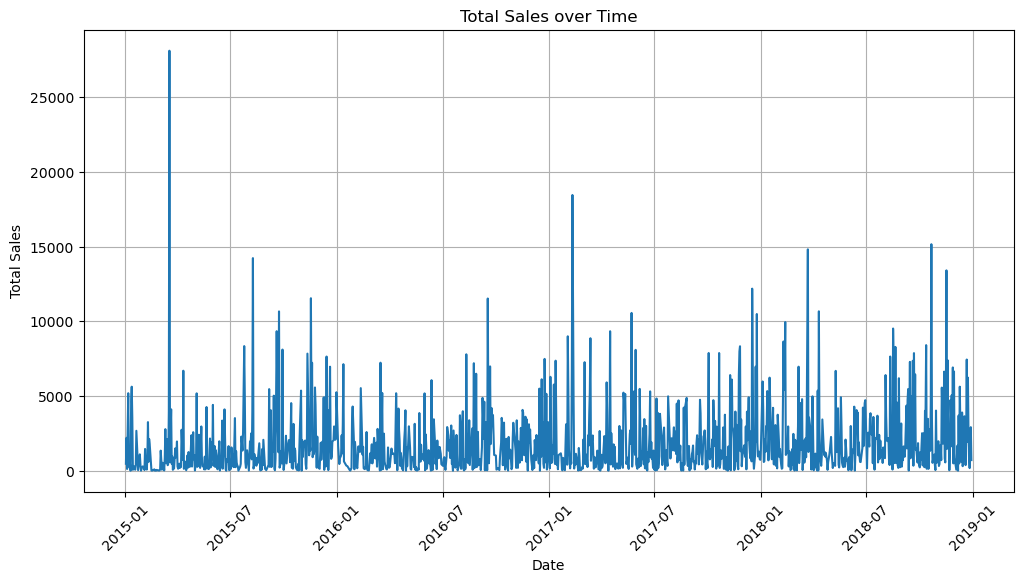

Date with the maximum sales: 2015-03-18 00:00:00
Maximum sales value on that date: 28106.716


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the cleaned dataset into a pandas DataFrame
df = pd.read_csv('superstore_cleaned_dataset.csv')

# Convert the "Order Date" column to a datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group the data by "Order Date" and calculate the total sales for each date
date_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Find the date with the maximum total sales
date_with_max_sales = date_sales.loc[date_sales['Sales'].idxmax()]

# Extract the date and maximum sales value
max_sales_date = date_with_max_sales['Order Date']
max_sales_value = date_with_max_sales['Sales']

# Plot the total sales over time
plt.figure(figsize=(12, 6))
plt.plot(date_sales['Order Date'], date_sales['Sales'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("Date with the maximum sales:", max_sales_date)
print("Maximum sales value on that date:", max_sales_value)

### 4. Average difference between the Order Date and Ship Date

In [13]:
import pandas as pd

# Read the cleaned dataset into a pandas DataFrame
df = pd.read_csv('superstore_cleaned_dataset.csv')

# Convert the "Order Date" and "Ship Date" columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate the time difference between "Ship Date" and "Order Date"
df['Time Difference'] = df['Ship Date'] - df['Order Date']

# Calculate the average time difference
average_time_difference = df['Time Difference'].mean()

print("Average difference between Order Date and Ship Date:", average_time_difference)


Average difference between Order Date and Ship Date: 9 days 04:23:54.262948207


C:\Users\panin\AppData\Local\Temp\ipykernel_21420\1429603761.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\panin\AppData\Local\Temp\ipykernel_21420\1429603761.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


### 5. Commonly used shipping method

In [14]:
import pandas as pd

# Read the cleaned dataset into a pandas DataFrame
df = pd.read_csv('superstore_cleaned_dataset.csv')

# Count the occurrences of each ship mode
ship_mode_counts = df['Ship Mode'].value_counts()

# Find the most commonly used ship mode (the one with the highest frequency)
most_common_ship_mode = ship_mode_counts.idxmax()

print("The most commonly used ship mode:", most_common_ship_mode)

The most commonly used ship mode: Standard Class


### 6. Customer who buys maximum products

In [15]:
import pandas as pd

# Read the cleaned dataset into a pandas DataFrame
df = pd.read_csv('superstore_cleaned_dataset.csv')

# Group the data by "Customer Name" and calculate the total number of products purchased by each customer
customer_product_count = df.groupby('Customer Name')['Product ID'].count().reset_index()

# Find the customer who buys the maximum number of products
customer_with_max_products = customer_product_count.loc[customer_product_count['Product ID'].idxmax()]

# Extract the customer name and the maximum product count
max_products_customer_name = customer_with_max_products['Customer Name']
max_product_count = customer_with_max_products['Product ID']

print("Customer who buys the maximum number of products:", max_products_customer_name)
print("Maximum number of products purchased:", max_product_count)


Customer who buys the maximum number of products: William Brown
Maximum number of products purchased: 35


### 7. City in which maximum sell has done

In [16]:
import pandas as pd

# Read the cleaned dataset into a pandas DataFrame
df = pd.read_csv('superstore_cleaned_dataset.csv')

# Group the data by "City" and calculate the total sales for each city
city_sales = df.groupby('City')['Sales'].sum().reset_index()

# Find the city with the maximum total sales
city_with_max_sales = city_sales.loc[city_sales['Sales'].idxmax()]

# Extract the city name and the maximum sales value
max_sales_city = city_with_max_sales['City']
max_sales_value = city_with_max_sales['Sales']

print("City with the maximum sales:", max_sales_city)
print("Maximum sales value in that city:", max_sales_value)

City with the maximum sales: New York City
Maximum sales value in that city: 252462.547


### 8. State in which maximum sell has done

In [17]:
import pandas as pd

# Read the cleaned dataset into a pandas DataFrame
df = pd.read_csv('superstore_cleaned_dataset.csv')

# Group the data by "State" and calculate the total sales for each state
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Find the state with the maximum total sales
state_with_max_sales = state_sales.loc[state_sales['Sales'].idxmax()]

# Extract the state name and the maximum sales value
max_sales_state = state_with_max_sales['State']
max_sales_value = state_with_max_sales['Sales']

print("State with the maximum sales:", max_sales_state)
print("Maximum sales value in that state:", max_sales_value)

State with the maximum sales: California
Maximum sales value in that state: 446306.4635
